In [4]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [15]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import datetime
import calendar
from scipy.stats import linregress
import seaborn as sns

# File to Load
file_to_load = "output_data/cleaned_avo.csv"

# Read Avocado File and store into Pandas data frame
avocado_data = pd.read_csv(file_to_load)

# Preview of the DataFrame
avocado_data.head()

,Unnamed: 0,Date,Average Price,Total Volume,Hass Small,Hass Large,Hass XLarge,Total Bags,Small Bags,Large Bags,XLarge Bags,Type,Year,Region,Total Sales
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,85434.70
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,74083.92
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,109944.80
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,85311.52
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,65330.69


In [16]:
# Count avocados by type (conventional vs organic)
group = avocado_data.groupby("Type")
total = group["Total Volume"].sum()

Text(0.5, 1.0, 'Type of Avocado Sales from 2015 - 2018')

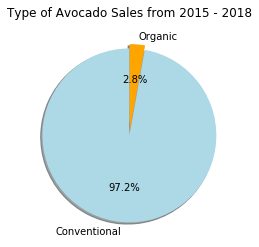

In [17]:
# Create PieChart
labels = ["Conventional", "Organic"]
counts = [9.385999e+09, 2.726631e+08]

avocado_type_df = pd.DataFrame({
    "counts": counts,
    "labels": labels
})

fig, ax = plt.subplots()

avocado_type_df.plot.pie(y= "counts", explode = (0.05, 0), labels = labels, colors = ["lightblue", "orange"], 
                         autopct="%1.1f%%", shadow=True, startangle = 90, legend = False, ax=ax)

ax.set_ylabel("")
ax.set_title("Type of Avocado Sales from 2015 - 2018")

In [18]:
# Group data by year
group_by_year = avocado_data.groupby(["Type","Year"])
total_by_year = group_by_year["Total Volume"].sum()/1000000

In [19]:
# Create DataFrame
type_year_bar = pd.DataFrame({
    "Year Totals": total_by_year
    })
type_year_bar.head(10)

Year Totals
Type         Year             
conventional 2015  2672.913320
             2016  2919.990424
             2017  2964.395912
             2018   828.699669
organic      2015    55.300121
             2016    81.740325
             2017   105.216224
             2018    30.406417

Text(0, 0.5, 'Units Sold (in millions)')

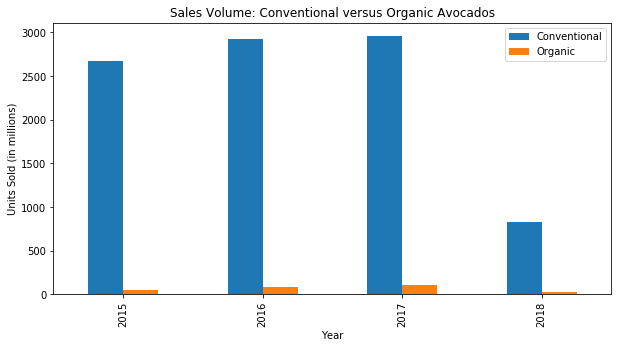

In [20]:
# Create BarChart
conventional = [2672.913320, 2919.990424, 2964.395912, 828.699669]
organic = [55.300121, 81.740325, 105.216224, 30.406417]
index = [2015, 2016, 2017, 2018]

df_multiplot = pd.DataFrame({
    "Conventional": conventional,
    "Organic": organic}, index = index)

multi_plot = df_multiplot.plot(kind = "bar", figsize=(10,5))

plt.title("Sales Volume: Conventional versus Organic Avocados")
plt.xlabel("Year")
plt.ylabel("Units Sold (in millions)")

In [21]:
# Grouping by region
data15=avocado_data[avocado_data['Year']==2015].groupby('Region')
data16=avocado_data[avocado_data['Year']==2016].groupby('Region')
data17=avocado_data[avocado_data['Year']==2017].groupby('Region')
data18=avocado_data[avocado_data['Year']==2018].groupby('Region')

In [22]:
# Calculations for totalvol(in millions)
T5=data15['Total Volume'].sum()/1000000
T6=data16['Total Volume'].sum()/1000000
T7=data17['Total Volume'].sum()/1000000
T8=data18['Total Volume'].sum()/1000000

# Region dataframe
totalvol_sum=pd.DataFrame({"2015": T5,
                            "2016":T6,
                              "2017":T7,
                              "2018":T8
                              })

In [23]:
# Remove top 8 regions
Without_8=totalvol_sum.drop(['California','GreatLakes','Midsouth','Northeast','Plains','SouthCentral','Southeast','West'])
Without_8.head()

,2015,2016,2017,2018
Region,,,,
Albany,4.029896,5.264336,5.231582,1.541986
Atlanta,23.231698,28.326878,28.815120,8.231422
BaltimoreWashington,40.645580,40.893802,41.015634,12.158903
Boise,3.784357,4.653510,4.760561,1.214760
Boston,27.454992,30.571315,30.610672,8.637006


In [24]:
# Region (no top 8) by sales volume - all years
x_axis = np.arange(len(Without_8))
plt.figure(figsize=(15,10))
tick_locations = [value for value in x_axis]
plt.bar(x_axis,Without_8['Total'], color="#ff4d94")
plt.title('Total Volume by Region over 4 years')
plt.xlabel('Region')
plt.ylabel('Total Volume (Million)')
plt.xticks(tick_locations, Without_8.index,rotation='vertical')
plt.show()

KeyError: 'Total'

<Figure size 1080x720 with 0 Axes>

In [ ]:
# Top 8 by year
top8=totalvol_sum.loc[['California','GreatLakes','Midsouth','Northeast','Plains','SouthCentral','Southeast','West']]
fig, ax = plt.subplots() 
top8.plot(kind='bar',figsize=(20,10),rot=0,fontsize=15,ax=ax).legend(loc='upper center')
ax.set(title="Top 8 Regions with Total Volume over 4 years",ylabel='Total Volume (Million)')

Growth: Identify year over year growth

In [ ]:
# Group data by year
year_view = avocado_data.groupby(["Year"])

# Calculations for analysis
total_volume = year_view["Total Volume"].sum()/1000000

# YoY Analysis data frame
YOY_df = pd.DataFrame({
    "Total Volume (in millions)": total_volume,
    })

In [ ]:
# Generate a bar plot showing YoY trends
YOY_df.plot(kind ="bar", title = "YoY Avocado Sales Volume",color=("blue","blue","blue",'coral'))

# Label x-axis
plt.xlabel("Year")
plt.ylabel("Unit Sales (in millions)")

# Show pandas bar plot
plt.show()

In [ ]:
# Formatting data frame
YOY_df = YOY_df.round(2)
YOY_df["Total Volume (in millions)"] = YOY_df["Total Volume (in millions)"].map("{:,}".format)

# Display dataframe - raw numbers YOY
YOY_df.sort_values(by = ["Year"], ascending=False)

Seasonality: Identify month over month trends.

In [ ]:
# Isolate needed columns for MoM trending
MoM_avo = avocado_data.loc[:,["Date", "Total Volume", "Total Sales", "Year"]]

In [ ]:
# Add month column and extract month using datetime import
MoM_avo["Month"] = pd.DatetimeIndex(MoM_avo['Date']).month

In [ ]:
# Group data by month
month_view = MoM_avo.groupby(["Month"])

# Calculations for analysis
total_sales = month_view["Total Sales"].sum()/1000000
total_volume = month_view["Total Volume"].sum()/1000000

# MoM Analysis data frame
MoM_df = pd.DataFrame({
    "Total Volume (in millions)": total_volume,
    })

In [ ]:
# Create a line chart from grouped MoM_df
MoM_line = MoM_df.plot(kind='line')

# Set the xlabel and ylabel using class methods
MoM_line.set_xlabel("Month")
MoM_line.set_ylabel("Unit Sales (in millions)")
MoM_line.set_title("US Avocado Sales MoM")

# Display MoM line chart
plt.show()

Sunburst chart: Show year and months

In [ ]:
# Data for sunburst chart
MoM_avo.head()

In [ ]:
#Change month to abbreviations
MoM_avo['Month'] = MoM_avo['Month'].apply(lambda x: calendar.month_abbr[x])

In [ ]:
# Create sunburst chart
fig = px.sunburst(MoM_avo, path=['Year', 'Month'], values='Total Volume')
fig.show()

In [ ]:
# Data for linear regression scatter plot
avocado_data["Month"] = pd.DatetimeIndex(avocado_data['Date']).month
avocado_data['Month'] = avocado_data['Month'].apply(lambda x: calendar.month_abbr[x])

In [ ]:
# Setting x and y values
x_values = avocado_data['Average Price']
y_values = avocado_data['Total Volume']

#Line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Build a scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2,.08),fontsize=15,color="red")

# Incorporate the other graph properties
plt.title("Average Price versus Total Sales Volume")
plt.xlabel('Average Price')
plt.ylabel('Total Sales Volume')
plt.grid(True)

# Save the figure & plot
plt.show()

In [ ]:
sns.heatmap(avocado_data.corr(), annot=True)